In [3]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [13]:
# Import our data into pandas from CSV
city_data = pd.read_csv('raw_data/city_data.csv')
riders_data = pd.read_csv('raw_data/ride_data.csv')

In [17]:
city_data = pd.DataFrame(city_data)
riders_data = pd.DataFrame(riders_data)

In [29]:
df = pd.merge(city_data, riders_data, on='city', how='left')

df = df.groupby(['city', "type"])
df = pd.DataFrame(round(df.mean(),2))

df = df.reset_index()

df.head()

,city,type,driver_count,fare,ride_id
0,Alvarezhaven,Urban,21.0,23.93,5.351586e+12
1,Alyssaberg,Urban,67.0,20.61,3.536678e+12
2,Anitamouth,Suburban,16.0,37.32,4.195870e+12
3,Antoniomouth,Urban,21.0,23.62,5.086800e+12
4,Aprilchester,Urban,49.0,21.98,4.574788e+12


In [60]:
# Find out total number of rides per city
ridesPerCity = riders_data.copy()

ridesPerCity = ridesPerCity.groupby('city')['ride_id'].count()
ridesPerCity = pd.DataFrame(ridesPerCity)
ridesPerCity = ridesPerCity.rename(columns={'ride_id':'Total rides'})
ridesPerCity = ridesPerCity.reset_index()

ridesPerCity.head()

,city,Total rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [63]:
df = pd.merge(df,ridesPerCity, on='city')

df = df.loc[:,['city', 'type','Total rides', 'driver_count', 'fare',]]

df = pd.DataFrame(df)
df.rename(columns={'city':'City',
                   'type':'Types',
                   'fare':'Average fare',
                   'driver_count':'Total drivers'
                  })




,City,Types,Total rides,Total drivers,Average fare
0,Alvarezhaven,Urban,31,21.0,23.93
1,Alyssaberg,Urban,26,67.0,20.61
2,Anitamouth,Suburban,9,16.0,37.32
3,Antoniomouth,Urban,22,21.0,23.62
4,Aprilchester,Urban,19,49.0,21.98
5,Arnoldview,Urban,31,41.0,25.11
6,Campbellport,Suburban,15,26.0,33.71
7,Carrollbury,Suburban,10,4.0,36.61
8,Carrollfort,Urban,29,55.0,25.40
9,Clarkstad,Suburban,12,21.0,31.05


# Bubble Plot 

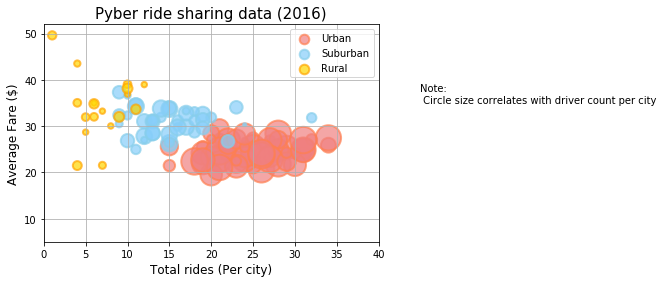

In [74]:
u = df.type.str.count(r'Urban')
s = df.type.str.count(r'Suburban')
r = df.type.str.count(r'Rural')
x = (df['Total rides'] * u) 
y = (df['fare'] * u)

plt.scatter(x, y, alpha=0.7, c='lightcoral', edgecolors='coral', s = df['driver_count']*10, label="Urban", linewidths=2)


x = (df['Total rides'] * s)
y = (df['fare'] * s)

plt.scatter(x, y, alpha=0.7, c='lightskyblue', edgecolors='skyblue', s = df['driver_count']*10, label='Suburban', linewidths=2)


x = (df['Total rides'] * r)
y = (df['fare'] * r)

plt.scatter(x, y, alpha=0.7, c='gold', edgecolors='orange', s = df['driver_count']*10, label='Rural', linewidths=2)

plt.ylim(5, 52)
plt.xlim(0, 40)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.xlabel('Total rides (Per city)', fontsize = 12)
plt.title("Pyber ride sharing data (2016)", fontsize = 15)
plt.grid()
plt.legend(loc="upper right", scatterpoints=1, fontsize=10, markerscale=0.5)
note = ("Note:\n Circle size correlates with driver count per city")
plt.text(45,35,note)
plt.show()

# % of Total Fares by City Type

([<matplotlib.patches.Wedge at 0x1e558f21278>,
 [Text(0.519068,0.969829,'Rural'),
  Text(-0.711316,0.839065,'Suburban'),
  Text(0.547779,-1.01116,'Urban')],
 [Text(0.283128,0.528998,'6.6%'),
  Text(-0.387991,0.457672,'31.4%'),
  Text(0.309614,-0.571523,'62.0%')])

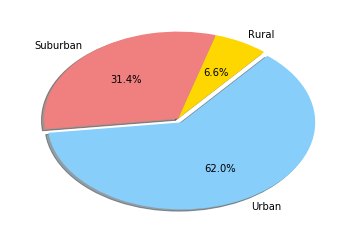

In [83]:

df1 = pd.merge(city_data, riders_data, on='city')
df1 = df1.groupby('type')['fare'].sum()
df1 = pd.DataFrame(df1)
df1['% of total fare'] = df1['fare']/df1['fare'].sum()*100
df1 = df1.reset_index()
types = df1['type']
total_fare = df1['% of total fare'] 
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)
plt.pie(total_fare, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)

# % of Total Rides by City Type

([<matplotlib.patches.Wedge at 0x1e558e74fd0>,
 [Text(0.558727,0.947536,'Rural'),
  Text(-0.48765,0.986001,'Suburban'),
  Text(0.333196,-1.10067,'Urban')],
 [Text(0.30476,0.516838,'5.3%'),
  Text(-0.265991,0.537819,'26.3%'),
  Text(0.188328,-0.622119,'68.4%')])

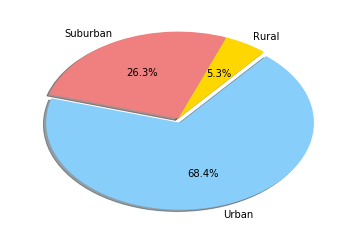

In [81]:
df2 = df.groupby('type')['Total rides'].sum()

df2 = pd.DataFrame(df2)

df2 = df2.reset_index()
df2['% of total rides'] = df2['Total rides']/df2['Total rides'].sum()* 100

types = df2['type']
total_rides = df2['% of total rides'] # Data which we want to show as a pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)
plt.pie(total_rides, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)

# % of Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x1e558ecf080>,
 [Text(0.621388,0.907677,'Rural'),
  Text(-0.0979326,1.09563,'Suburban'),
  Text(-0.0102357,-1.17996,'Urban')],
 [Text(0.338939,0.495096,'3.1%'),
  Text(-0.0534178,0.597617,'18.8%'),
  Text(-0.00589855,-0.679974,'78.1%')])

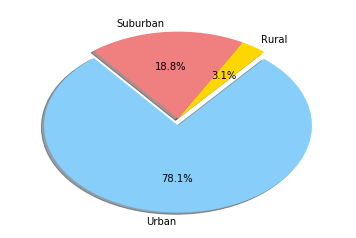

In [82]:
df3 = df.groupby('type')['driver_count'].sum()
df3 = pd.DataFrame(df3)
df3 = df3.reset_index()
df3['% of total drivers'] = df3['driver_count']/df3['driver_count'].sum()* 100
types = df3['type']
total_drivers = df3['% of total drivers'] # Data which we want to show as a pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.08)
plt.pie(total_drivers, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)

# Observations 
Fares in rural areas are cheaper compared to suburban and urban areas
There are more drivers in urban areas than bothe rural and surbaban areas combined
The higher the number of rides, the higher the price